In [1]:
%matplotlib notebook
import os
import pandas as pd 
import math
import numpy as np 
import matplotlib.pyplot as plt
import random as r 
import glob

In [4]:
# grab simulation and predicted dataframes 
#############################################
simfilepath = "/nBodyData/brutusSim/batch_brutus6*"
alf = [i for i in glob.glob(simfilepath)]
sdf = pd.concat([pd.read_csv(f, index_col=False) for f in alf],sort=False)


prediction = False # whether read nn file or nots
# nnfile = "/nBodyData/pred/predicted_paths_3_combined.csv"
nnfile = "/nBodyData/pred/predicted_paths_batch_3_1.csv"
dataCols = ["x1tEnd_p", "x2tEnd_p", "x3tEnd_p", "y1tEnd_p", "y2tEnd_p", "y3tEnd_p","eventID"]

pdf = sdf
if prediction:
    pdf = pd.read_csv(nnfile, names=dataCols)

In [5]:
pdf

,file,eventID,m1,m2,m3,x1,x2,x3,y1,y2,...,y3tEnd,dx1tEnd,dx2tEnd,dx3tEnd,dy1tEnd,dy2tEnd,dy3tEnd,e1,e2,e3
0,1685013102,10001,93.474798,97.461269,78.906816,8.60196,-1.16343,-9.36801,0.862669,1.30128,...,-1.473253,0.039243,0.460807,0.073364,0.796792,0.736144,0.921211,-2037.099127,189.728805,-2226.827933
1,1685013102,10002,93.474798,97.461269,78.906816,8.60196,-1.16343,-9.36801,0.862669,1.30128,...,-1.469651,0.034330,0.460737,0.079271,0.796850,0.734656,0.922981,-2037.099127,189.770710,-2226.869838
2,1685013102,10003,93.474798,97.461269,78.906816,8.60196,-1.16343,-9.36801,0.862669,1.30128,...,-1.466042,0.029415,0.460669,0.085177,0.796908,0.733169,0.924749,-2037.099127,189.818151,-2226.917279
3,1685013102,10004,93.474798,97.461269,78.906816,8.60196,-1.16343,-9.36801,0.862669,1.30128,...,-1.462426,0.024500,0.460603,0.091082,0.796965,0.731683,0.926516,-2037.099127,189.871129,-2226.970256
4,1685013102,10005,93.474798,97.461269,78.906816,8.60196,-1.16343,-9.36801,0.862669,1.30128,...,-1.458804,0.019582,0.460539,0.096985,0.797023,0.730199,0.928281,-2037.099127,189.929642,-2227.028769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,1685013102,22556,9.192935,64.563674,23.158513,-9.48250,2.49990,4.07863,-8.742280,-6.78627,...,4.770292,-0.363117,0.296665,0.228027,1.945889,0.376022,-0.127361,-275.248315,43.616948,-318.865263
5116,1685013102,22557,9.192935,64.563674,23.158513,-9.48250,2.49990,4.07863,-8.742280,-6.78627,...,4.769789,-0.353177,0.295800,0.226494,1.950361,0.376379,-0.130134,-275.248315,43.787690,-319.036005
5117,1685013102,22558,9.192935,64.563674,23.158513,-9.48250,2.49990,4.07863,-8.742280,-6.78627,...,4.769275,-0.343201,0.294929,0.224960,1.954824,0.376739,-0.132908,-275.248315,43.960535,-319.208850
5118,1685013102,22559,9.192935,64.563674,23.158513,-9.48250,2.49990,4.07863,-8.742280,-6.78627,...,4.768751,-0.333189,0.294054,0.223425,1.959279,0.377100,-0.135683,-275.248315,44.135496,-319.383811


In [12]:
# combine dataframes
###############################################
pdf.eventID = pdf.eventID.astype(int)
pdf.sort_values(["eventID"], axis=0, ascending=True, inplace= True) 

mdf = pdf
if prediction:
    adf = pd.merge(left=sdf,right=pdf, on='eventID')
    mdf = adf.drop_duplicates(subset='eventID')

20000


<IPython.core.display.Javascript object>


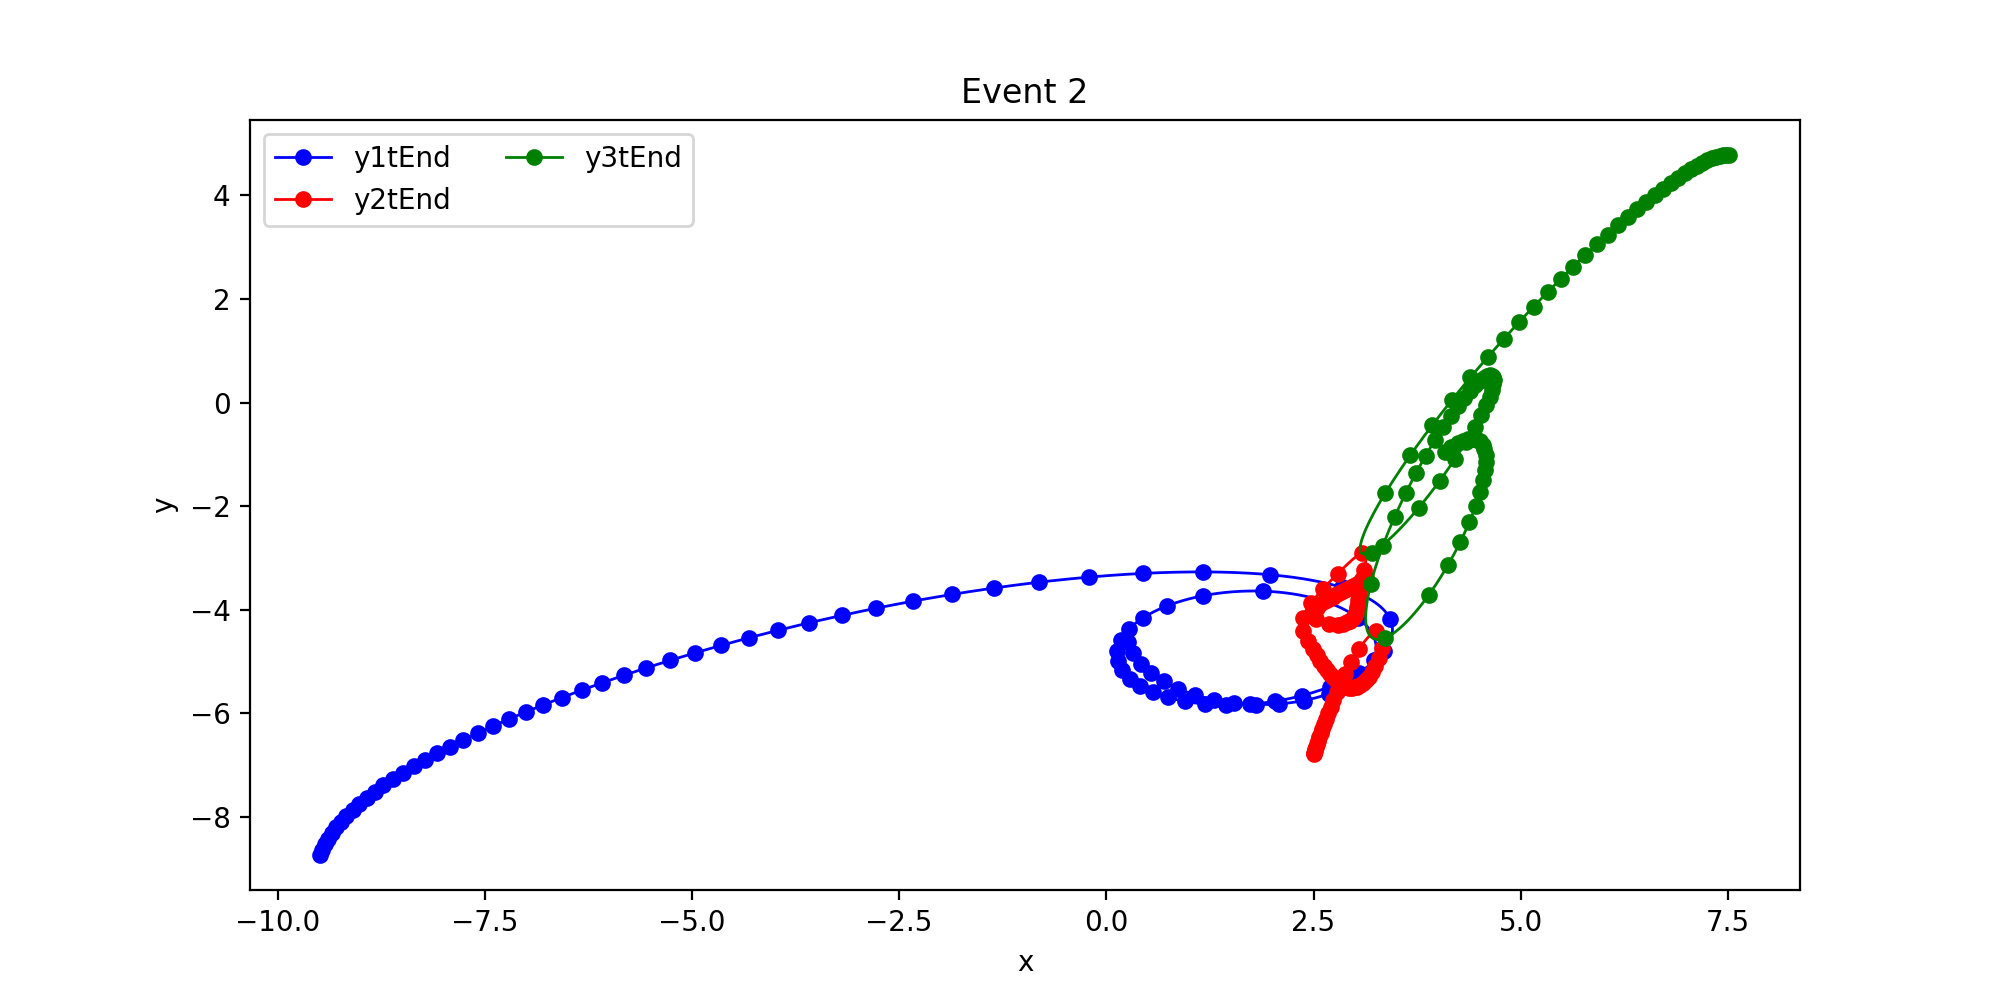

In [13]:
# plot an individual event
###############################################

# pick event to plot
r.seed(1)
indexArray = np.array(mdf['eventID'])
indexArray = np.unique((indexArray/10000).astype(int))
index = np.random.choice(indexArray)*10000
print(index)

# plot event 
edf = mdf.loc[(mdf['eventID'] >= index) & (mdf['eventID'] <= (index+2560))]
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,5)

tsize = 5
ax.plot('x1tEnd', 'y1tEnd', data=edf, color='blue', marker='o',linewidth=1, markersize=tsize, markevery=30)
ax.plot('x2tEnd', 'y2tEnd', data=edf, color='red', marker='o',linewidth=1, markersize=tsize, markevery=30)
ax.plot('x3tEnd', 'y3tEnd', data=edf, color='green', marker='o',linewidth=1, markersize=tsize, markevery=30)

if prediction:
    ax.plot('x1tEnd_p', 'y1tEnd_p', data=edf, color='blue', marker='x', linestyle=':', linewidth=1, markersize=tsize, markevery=30)
    ax.plot('x2tEnd_p', 'y2tEnd_p', data=edf, color='red', marker='x', linestyle=':', linewidth=1, markersize=tsize, markevery=30)
    ax.plot('x3tEnd_p', 'y3tEnd_p', data=edf, color='green', marker='x', linestyle=':', linewidth=1, markersize=tsize, markevery=30)

plt.legend(loc='best', ncol=2, fancybox=True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Event {0}'.format(int(index/10000)))
plt.show()

In [15]:
# define possible metrics
#####################################

# barycenter
mdf['ibaryX'] = (mdf['m1']*mdf['x1']+mdf['m2']*mdf['x2']+mdf['m3']*mdf['x3'])/(mdf['m1']+mdf['m2']+mdf['m3'])
mdf['ibaryY'] = (mdf['m1']*mdf['y1']+mdf['m2']*mdf['y2']+mdf['m3']*mdf['y3'])/(mdf['m1']+mdf['m2']+mdf['m3'])
mdf['baryX'] = (mdf['m1']*mdf['x1tEnd']+mdf['m2']*mdf['x2tEnd']+mdf['m3']*mdf['x3tEnd'])/(mdf['m1']+mdf['m2']+mdf['m3'])
mdf['baryY'] = (mdf['m1']*mdf['y1tEnd']+mdf['m2']*mdf['y2tEnd']+mdf['m3']*mdf['y3tEnd'])/(mdf['m1']+mdf['m2']+mdf['m3'])
mdf['baryDiffX'] = np.abs(mdf['baryX']-mdf['ibaryX'])
mdf['baryDiffY'] = np.abs(mdf['baryY']-mdf['ibaryY'])


# energy



# moment of inertia
mdf['imomentX'] = mdf['m1']*(mdf['x1']**2) + mdf['m2']*(mdf['x2']**2) + mdf['m3']*(mdf['x3']**2)
mdf['momentX'] = mdf['m1']*(mdf['x1tEnd']**2) + mdf['m2']*(mdf['x2tEnd']**2) + mdf['m3']*(mdf['x3tEnd']**2)
mdf['imomentY'] = mdf['m1']*(mdf['y1']**2) + mdf['m2']*(mdf['y2']**2) + mdf['m3']*(mdf['y3']**2)
mdf['momentY'] = mdf['m1']*(mdf['y1tEnd']**2) + mdf['m2']*(mdf['y2tEnd']**2) + mdf['m3']*(mdf['y3tEnd']**2)
mdf['momentDiffX'] = np.abs(mdf['momentX']-mdf['imomentX'])
mdf['momentDiffY'] = np.abs(mdf['momentY']-mdf['imomentY'])


# momentum/angular momentum


# plot nn vars only if loaded
if prediction:
    mdf['baryX_p'] = (mdf['m1']*mdf['x1tEnd_p']+mdf['m2']*mdf['x2tEnd_p']+mdf['m3']*mdf['x3tEnd_p'])/(mdf['m1']+mdf['m2']+mdf['m3'])
    mdf['baryY_p'] = (mdf['m1']*mdf['y1tEnd_p']+mdf['m2']*mdf['y2tEnd_p']+mdf['m3']*mdf['y3tEnd_p'])/(mdf['m1']+mdf['m2']+mdf['m3'])
    mdf['baryDiffX_p'] = np.abs(mdf['baryX_p']-mdf['ibaryX'])
    mdf['baryDiffY_p'] = np.abs(mdf['baryY_p']-mdf['ibaryY'])
    mdf['momentDiffX_p'] = np.abs(mdf['momentX_p']-mdf['imomentX'])
    mdf['momentDiffY_p'] = np.abs(mdf['momentY_p']-mdf['imomentY'])
    mdf['momentX_p'] = mdf['m1']*(mdf['x1tEnd_p']**2) + mdf['m2']*(mdf['x2tEnd_p']**2) + mdf['m3']*(mdf['x3tEnd_p']**2)
    mdf['momentY_p'] = mdf['m1']*(mdf['y1tEnd_p']**2) + mdf['m2']*(mdf['y2tEnd_p']**2) + mdf['m3']*(mdf['y3tEnd_p']**2)

10000


<IPython.core.display.Javascript object>


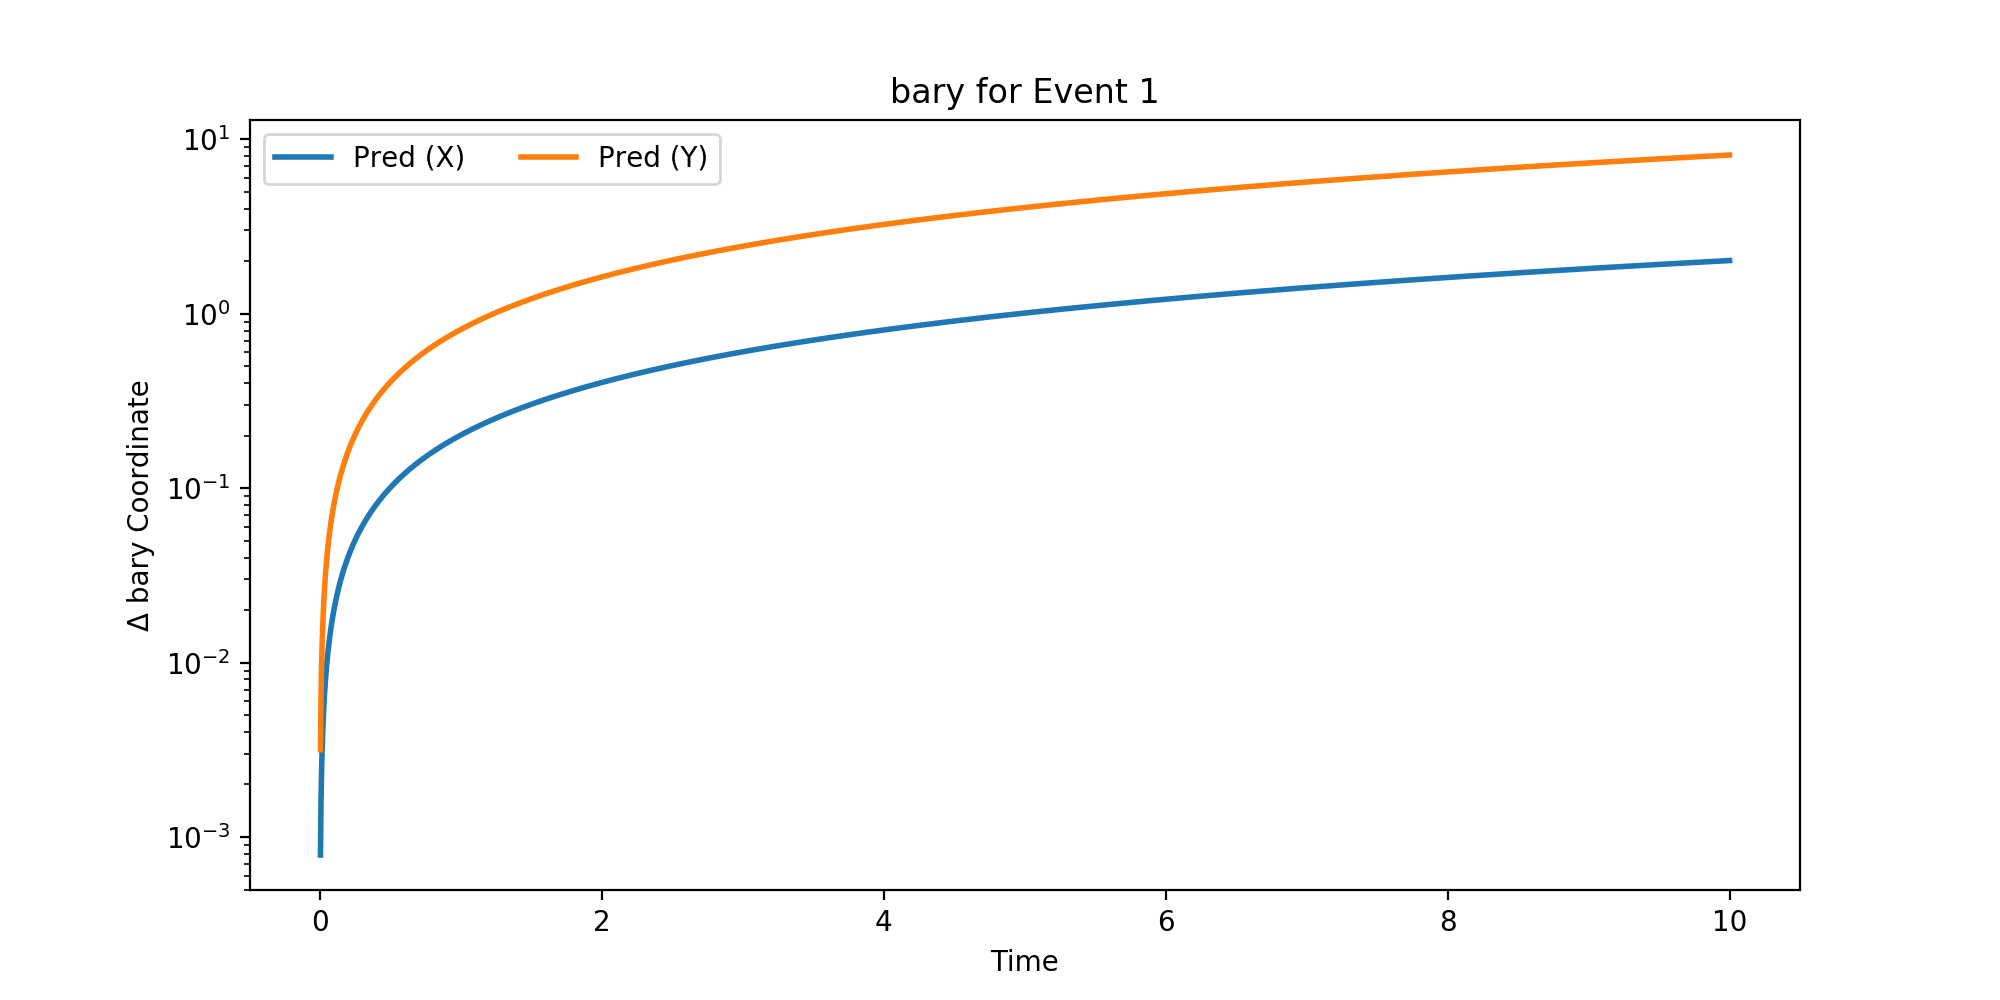

In [37]:
# plot metric (for all or 1 event)
####################################
singleEvent = True
metric = "bary" # currently availible metrics: bary, moment

# pick event to plot
r.seed(1)
indexArray = np.array(mdf['eventID'])
indexArray = np.unique((indexArray/10000).astype(int))
index = np.random.choice(indexArray)*10000
print(index)
ddf = mdf
edf = mdf.loc[(mdf['eventID'] >= index) & (mdf['eventID'] <= (index+2560))]
if singleEvent: ddf = edf

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,5)

bsize = 1
lsize = 0
if singleEvent: 
    bsize = 0
    lsize = 2

if prediction:
    ax.plot('tEnd', '{0}DiffX_p'.format(metric), data=ddf, markersize=bsize, marker='o', linewidth=lsize)
    ax.plot('tEnd', '{0}DiffY_p'.format(metric), data=ddf, markersize=bsize, marker='o', linewidth=lsize)

ax.plot('tEnd', '{0}DiffX'.format(metric), data=ddf, markersize=bsize, marker='o', linewidth=lsize)
ax.plot('tEnd', '{0}DiffY'.format(metric), data=ddf, markersize=bsize, marker='o', linewidth=lsize)

ax.set_yscale('log')
plt.xlabel('Time')
plt.ylabel('Δ {0} Coordinate'.format(metric))
if singleEvent: plt.title("{0} for Event {1}".format(metric,int(index/10000)))
else: plt.title("{0} for All events".format(metric))
plt.legend(("Pred (X)", "Pred (Y)", "Sim (X)", "Sim (Y)"),loc='best', ncol=2, fancybox=True)
# plt.show()